### data set
https://www.kaggle.com/retailrocket/ecommerce-dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn

import warnings
warnings.simplefilter('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### load data

In [33]:
events = pd.DataFrame.from_csv('./data/train_events_3.csv')

In [34]:
#избавимся от NaN

In [35]:
events.item_cat = events.item_cat.replace({np.nan : -1})

In [36]:
events.tail(5)

,index,timestamp,visitorid,event,itemid,transactionid,delta,delta1,ssid,session_type,item_cat,item_cat_dist,event_type,session_transation_type
1355818,1796160,1437973995037,1407573,view,57720,-1,3.724917,3.724917,592158,1,1318.0,0.0,0,0
1355819,1902650,1438402327230,1407573,view,363109,-1,7138.869883,NaN,592159,0,-1.0,0.0,0,0
1355820,1902661,1438402365311,1407573,view,463766,-1,0.634683,0.634683,592159,0,-1.0,0.0,0,0
1355821,1951634,1438648367715,1407573,view,82278,-1,4100.040067,NaN,592160,1,1659.0,0.0,0,0
1355822,1951674,1438648495146,1407573,view,82278,-1,2.123850,2.123850,592160,1,1659.0,0.0,0,0


In [37]:
events.session_transation_type.value_counts()

0    1292348
1      63475
Name: session_transation_type, dtype: int64

In [18]:
events.last_valid_index()

1355822

In [15]:
ssids = events.ssid.unique()

In [16]:
ssids.shape[0]

592160

In [22]:
%%time
drop_list = []
for i in ssids:
    event = events.loc[events.ssid == i]
    drop_list.append(event.last_valid_index())

CPU times: user 23min 36s, sys: 10.5 s, total: 23min 46s
Wall time: 23min 57s


In [38]:
len(drop_list)

592160

In [43]:
events.reset_index(inplace=True)

In [44]:
events.head()

,level_0,index,timestamp,visitorid,event,itemid,transactionid,delta,delta1,ssid,session_type,item_cat,item_cat_dist,event_type,session_transation_type
0,0,2024720,1438969904567,2,view,325215,-1,NaN,NaN,1,2,299.0,0.0,0,0
1,1,2024760,1438970013790,2,view,325215,-1,1.820383,1.820383,1,2,299.0,0.0,0,0
2,2,2024834,1438970212664,2,view,259884,-1,3.314567,3.314567,1,2,299.0,0.0,0,0
3,3,2024945,1438970468920,2,view,216305,-1,4.270933,4.270933,1,2,299.0,0.0,0,0
4,4,2025140,1438970905669,2,view,342816,-1,7.279150,7.279150,1,2,444.0,10.0,0,0


In [46]:
e = events.loc[events.index.isin(drop_list)]

In [47]:
e.shape

(592160, 15)

In [48]:
events.shape[0] - e.shape[0]

763663

In [49]:
events_ = events.drop(e.index,axis=0)

In [51]:
events_.shape[0]

763663

In [55]:
events_ = events.drop('level_0',axis=1)

In [ ]:
#сгруппируем сессии

In [56]:
%%time
sessions_ =  events_[['ssid',
                     'delta1',
                     'itemid',
                     'session_type',
                     'item_cat',
                     'event_type',
                     'item_cat_dist',
                     'session_transation_type'
                     ]].groupby('ssid').agg(['mean','count','sum','max','nunique'])

CPU times: user 1.77 s, sys: 339 ms, total: 2.1 s
Wall time: 2.14 s


In [83]:
sessions = sessions_

In [84]:
sessions_.head()

delta1                                         itemid                 \
          mean count        sum       max nunique        mean count      sum   
ssid                                                                           
1     4.174471     7  29.221300  8.978433       7  294221.375     8  2353771   
2     3.101067     1   3.101067  3.101067       1  152167.500     2   304335   
3          NaN     0        NaN       NaN       0  226353.000     1   226353   
4     0.883883     1   0.883883  0.883883       1  299639.000     2   599278   
5     0.393533     1   0.393533  0.393533       1   86411.000     2   172822   

                       ...   item_cat_dist                            \
         max nunique   ...            mean count   sum   max nunique   
ssid                   ...                                             
1     342816       4   ...             2.5     8  20.0  10.0       2   
2     164941       2   ...             2.0     2   4.0   4.0       2   
3     226353       1   ...             0.0     1   0.0   0.0       1   
4     320589       2   ...             2.5     2   5.0   5.0       2   
5      86411       1   ...             0.0     2   0.0   0.0       1   

     session_transation_type                        
                        mean count sum max nunique  
ssid                                                
1                          0     8   0   0       1  
2                          0     2   0   0       1  
3                          0     1   0   0       1  
4                          0     2   0   0       1  
5                          0     2   0   0       1  

[5 rows x 35 columns]

In [85]:
sessions.head(5)

delta1                                         itemid                 \
          mean count        sum       max nunique        mean count      sum   
ssid                                                                           
1     4.174471     7  29.221300  8.978433       7  294221.375     8  2353771   
2     3.101067     1   3.101067  3.101067       1  152167.500     2   304335   
3          NaN     0        NaN       NaN       0  226353.000     1   226353   
4     0.883883     1   0.883883  0.883883       1  299639.000     2   599278   
5     0.393533     1   0.393533  0.393533       1   86411.000     2   172822   

                       ...   item_cat_dist                            \
         max nunique   ...            mean count   sum   max nunique   
ssid                   ...                                             
1     342816       4   ...             2.5     8  20.0  10.0       2   
2     164941       2   ...             2.0     2   4.0   4.0       2   
3     226353       1   ...             0.0     1   0.0   0.0       1   
4     320589       2   ...             2.5     2   5.0   5.0       2   
5      86411       1   ...             0.0     2   0.0   0.0       1   

     session_transation_type                        
                        mean count sum max nunique  
ssid                                                
1                          0     8   0   0       1  
2                          0     2   0   0       1  
3                          0     1   0   0       1  
4                          0     2   0   0       1  
5                          0     2   0   0       1  

[5 rows x 35 columns]

In [86]:
sessions_['event_type']['nunique'].value_counts()

1    559605
2     24004
3      8551
Name: nunique, dtype: int64

In [87]:
sessions = sessions.reset_index()

In [88]:
sessions['count'] = sessions['itemid']['count']

In [89]:
sessions['items_unique'] = sessions['itemid']['nunique']

In [90]:
sessions = sessions.drop(['itemid'],axis=1)

In [91]:
sessions['ssid_type'] = sessions['session_type']['max']

In [92]:
sessions = sessions.drop(['session_type'],axis=1)

In [93]:
sessions['sessions_len'] = sessions['delta1']['sum']
sessions['delta_mean'] = sessions['delta1']['mean']

In [94]:
sessions = sessions.drop(['delta1'],axis=1)

In [95]:
sessions['categories'] = sessions['item_cat']['nunique']
sessions = sessions.drop(['item_cat'],axis=1)

In [96]:
sessions['event_type_nu'] = sessions['event_type']['nunique']
sessions = sessions.drop(['event_type'],axis=1)

In [97]:
sessions['dist1_mean'] = sessions['item_cat_dist']['mean']
sessions['dist1_max'] = sessions['item_cat_dist']['max']
sessions['dist1_sum'] = sessions['item_cat_dist']['sum']
sessions = sessions.drop(['item_cat_dist'],axis=1)

In [98]:
sessions['target'] = sessions['session_transation_type']['max']

In [99]:
sessions = sessions.drop(['session_transation_type'],axis=1)

In [100]:
#!!
sessions['event_type_nu'] = sessions['event_type_nu'].replace({1: 0, 2: 1, 3: 1})

In [101]:
sessions['target'].value_counts()

0    580960
1     11200
Name: target, dtype: int64

In [102]:
sessions.shape[0]

592160

In [103]:
sessions.loc[sessions.target > 0].shape[0]

11200

In [118]:
sessions.head()

,ssid,count,items_unique,ssid_type,sessions_len,delta_mean,categories,event_type_nu,dist1_mean,dist1_max,dist1_sum,target
,,,,,,,,,,,,
0,1,8,4,2,29.221300,4.174471,2,0,2.5,10.0,20.0,0
1,2,2,2,1,3.101067,3.101067,2,0,2.0,4.0,4.0,0
2,3,1,1,-1,NaN,NaN,1,0,0.0,0.0,0.0,0
3,4,2,2,0,0.883883,0.883883,2,0,2.5,5.0,5.0,0
4,5,2,1,0,0.393533,0.393533,1,0,0.0,0.0,0.0,0


In [120]:
sessions_ = sessions.loc[sessions['count'] > 1]
# выкинем единичные сессии

In [122]:
sessions_.shape[0]

306474

In [123]:
data = sessions_.drop(['ssid'], axis=1)

In [124]:
#матрица корреляциЙ между признаками
data.corr()

,,count,items_unique,ssid_type,sessions_len,delta_mean,categories,event_type_nu,dist1_mean,dist1_max,dist1_sum,target
,,,,,,,,,,,,
count,,1.000000,0.907016,0.304642,0.618112,-0.067843,0.616987,0.176565,0.202911,0.298216,0.726412,0.116114
items_unique,,0.907016,1.000000,0.240353,0.549305,-0.075916,0.669930,0.045520,0.272854,0.354335,0.726962,0.023562
ssid_type,,0.304642,0.240353,1.000000,0.616996,0.615273,0.190641,0.126794,0.147244,0.203903,0.193097,0.155039
sessions_len,,0.618112,0.549305,0.616996,1.000000,0.507215,0.510612,0.131490,0.189821,0.252554,0.527383,0.130055
delta_mean,,-0.067843,-0.075916,0.615273,0.507215,1.000000,-0.011818,-0.047601,0.006272,-0.003467,-0.024738,0.006737
categories,,0.616987,0.669930,0.190641,0.510612,-0.011818,1.000000,0.071763,0.589272,0.598700,0.911939,0.061353
event_type_nu,,0.176565,0.045520,0.126794,0.131490,-0.047601,0.071763,1.000000,-0.009676,0.041042,0.088860,0.547318
dist1_mean,,0.202911,0.272854,0.147244,0.189821,0.006272,0.589272,-0.009676,1.000000,0.926459,0.523309,-0.005227
dist1_max,,0.298216,0.354335,0.203903,0.252554,-0.003467,0.598700,0.041042,0.926459,1.000000,0.516843,0.018814


In [125]:
data = sessions_.drop(['ssid','target'], axis=1)
target = sessions_.target

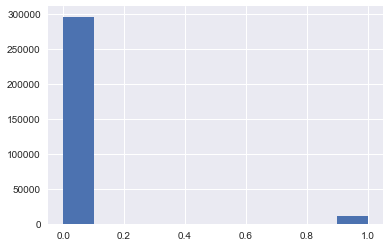

In [126]:
target.hist()

In [127]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [128]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)

In [129]:
X_train.shape[0]

245179

In [130]:
X_test.shape[0]

61295

In [131]:
y_train.value_counts()

0    236750
1      8429
Name: target, dtype: int64

In [132]:
y_test.value_counts()
#баланс классов в трейн/тест сохранили

0    59188
1     2107
Name: target, dtype: int64

In [133]:
#сбалансируем тренинг выборку

In [134]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)

In [135]:
#Обучающая выборка
X_resampled.shape[0]

473500

In [136]:
y_resampled.shape[0]

473500

In [137]:
y_resampled

array([0, 0, 0, ..., 1, 1, 1])

In [138]:
unique, counts = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique, counts)).T)
#теперь классы сбалансированы

[[     0 236750]
 [     1 236750]]


In [405]:
#Оценка качества методом кроссвалидации
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [406]:
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

In [416]:
model = RandomForestClassifier(n_jobs=-1,oob_score=True,random_state = 42, verbose=0)

In [418]:
param_grid = {
                 'n_estimators': [ 20, 50, 150, 500],
                 'max_features': [ 3, 5, 7, 10]
             }

In [419]:
%%time
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(model, param_grid, cv=cv,scoring = 'f1')
grid_clf.fit(X_resampled,y_resampled)

CPU times: user 4h 33min 35s, sys: 4min 10s, total: 4h 37min 46s
Wall time: 46min 52s


In [420]:
y_pred = grid_clf.best_estimator_.predict(X_test)

In [421]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [422]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [423]:
accuracy_score(y_test, y_pred)

0.96702830573456233

In [424]:
confusion_matrix(y_test, y_pred)

array([[58135,  1053],
       [  968,  1139]])

In [425]:
target_names = ['class 0', 'class 1']
print(classification_report( y_test,y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.98      0.98      0.98     59188
    class 1       0.52      0.54      0.53      2107

avg / total       0.97      0.97      0.97     61295



In [426]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [427]:
print(grid_clf.best_score_)
print(grid_clf.best_params_)

0.990030715623
{'max_features': 3, 'n_estimators': 150}


In [428]:
# важность фич

([<matplotlib.axis.YTick at 0x1935ba5c0>,
 <a list of 10 Text yticklabel objects>)

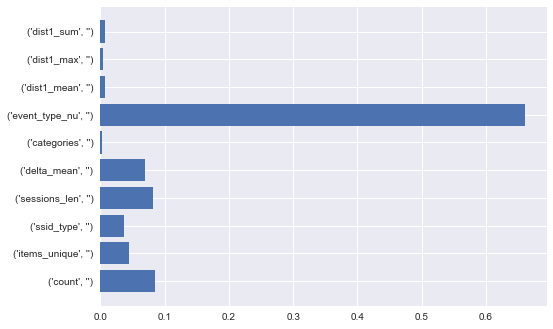

In [429]:
plt.barh(np.arange(len(grid_clf.best_estimator_.feature_importances_)), grid_clf.best_estimator_.feature_importances_)
plt.yticks(np.arange(len(data.columns)),data.columns)

In [430]:
from sklearn.metrics import precision_recall_curve, roc_curve ,auc, roc_auc_score

In [431]:
model = grid_clf.best_estimator_
model.fit(X_resampled,y_resampled)
predictions = model.predict_proba(X_test)

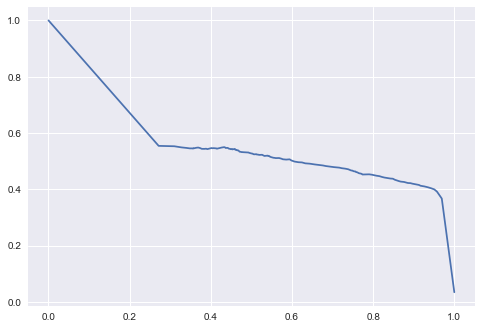

In [452]:
pr, re, thres = precision_recall_curve(y_test, predictions[:, 1] )
plt.plot( re, pr )
# построим precision - recall кривую

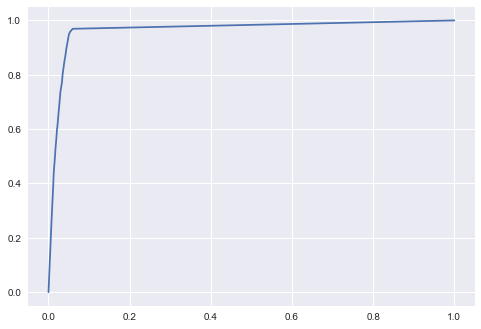

In [450]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1] )
plt.plot( fpr, tpr )
# построим ROC-кривую (Receiver Operating Characteristic)

In [434]:
roc_auc_score( y_test, predictions[:, 1] )

0.96527631548603066

In [435]:
auc( fpr, tpr )

0.96527631548603066

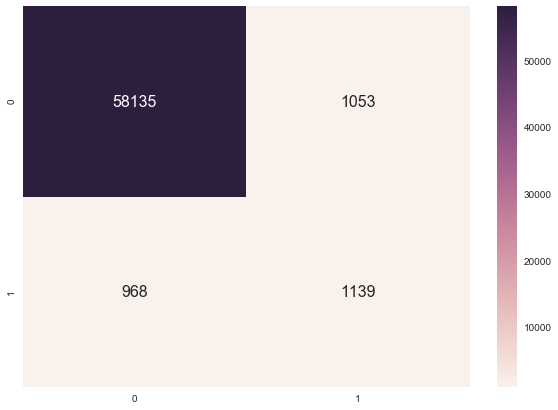

In [438]:
plt.figure(figsize = (10,7))
sn.set(font_scale=1)#for label size
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True,annot_kws={"size": 16} ,fmt="d")# font size

In [444]:
from sklearn.externals import joblib

In [445]:
filename = 'rf.joblib.pkl'

In [446]:
_ = joblib.dump(clf, filename, compress=9)

In [447]:
rf = joblib.load(filename)